# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/manjeetsingh/retaildataset?select=stores+data-set.csv

Import the necessary libraries and create your dataframe(s).

In [4]:
#import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in my dataset

features_df = pd.read_csv("Features data set.csv")
sales_df = pd.read_csv("sales data-set.csv")
stores_df = pd.read_csv("stores data-set.csv")

# Get information on data and see the first five entries
print(features_df.head())
print('\n\n')
print(sales_df.head())
print('\n\n')
print(stores_df.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  



   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/

In [7]:
#Merge our three tables
merge_df = pd.merge(sales_df,features_df, on=['Store','Date', 'IsHoliday'], how='left')
merge_df = pd.merge(merge_df,stores_df, on=['Store'], how='left')


#Parse the dates
merge_df['Date'] = pd.to_datetime(merge_df['Date'])


#See if dataframe was imported properly and get more information on the dataframe table
merge_df.info()
merge_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

C:\Users\Ocey 2.0\AppData\Local\Temp\ipykernel_11100\1646296596.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merge_df['Date'] = pd.to_datetime(merge_df['Date'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [8]:
#Check how much data is missing for each column
#A large amount of Markdown prices are missing
merge_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [10]:
#This shows a data percentage list
for col in merge_df.columns:
    pct_missing = np.mean(merge_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Store - 0%
Dept - 0%
Date - 0%
Weekly_Sales - 0%
IsHoliday - 0%
Temperature - 0%
Fuel_Price - 0%
MarkDown1 - 64%
MarkDown2 - 74%
MarkDown3 - 67%
MarkDown4 - 68%
MarkDown5 - 64%
CPI - 0%
Unemployment - 0%
Type - 0%
Size - 0%


In [11]:
#For the missing data I will likely manually fill the nulls with zero
merge_df=merge_df.fillna(0)

merge_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [12]:
#See some basic states for the columns in our dataset
merge_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [22]:
#multiple density plot


In [26]:
#Create a new column where Weekly Sales is represented with Millions (as opposed to Dollar amounts)
merge_df['Weekly_Sales_Millions'] = merge_df['Weekly_Sales']/1000000

{'whiskers': [<matplotlib.lines.Line2D at 0x165bf89e850>,
 'caps': [<matplotlib.lines.Line2D at 0x165bf89d210>,
 'boxes': [<matplotlib.lines.Line2D at 0x165be90ed10>,
 'medians': [<matplotlib.lines.Line2D at 0x165bf80b4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x165c9521d50>,
 'means': []}

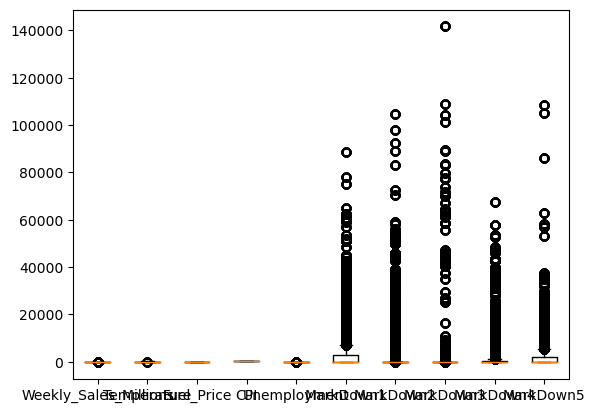

In [39]:
#Plotting a boxplot using matplotlib
#create seperate datasets with just the values from the sales columns

Weekly_Sales_Millions = merge_df["Weekly_Sales_Millions"].values
Temperature = merge_df["Temperature"].values
Fuel_Price = merge_df["Fuel_Price"].values
CPI = merge_df["CPI"].values
Unemployment = merge_df["Unemployment"].values
MarkDown1 = merge_df["MarkDown1"].values
MarkDown2 = merge_df["MarkDown2"].values
MarkDown3 = merge_df["MarkDown3"].values
MarkDown4 = merge_df["MarkDown4"].values
MarkDown5 = merge_df["MarkDown5"].values


plt.boxplot([Weekly_Sales_Millions, Temperature, Fuel_Price, CPI, Unemployment, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5],
             labels=['Weekly_Sales_Millions', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [ ]:
#Looking at the plot above I can see there are some outliers in our boxplot
#Since this information is a representation of sales/prices I will not do anythong to the outliers

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [40]:
#Check for duplicates
#There are no duplicates
merge_df.duplicated().value_counts()

False    421570
dtype: int64

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [42]:
#Looking at my Discrete coloumns I do not see any incosistencies
#I do not see any in my Numerical data either from my previous analysis from above
#May want to take a closer look at games that made zero in sales
print(merge_df["Store"].unique())
print('\n\n')
print(merge_df["Dept"].unique())
print('\n\n')
print(merge_df["IsHoliday"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]



[False  True]


In [43]:
#Checkkng to see if stores had zero Weekly Sales
df_zero_sales = merge_df[merge_df["Weekly_Sales"] == 0]
df_zero_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_Millions
6055,1,47,2011-11-03,0.0,False,53.56,3.459,0.00,0.00,0.00,0.0,0.00,214.111056,7.742,A,151315,0.0
6059,1,47,2011-12-08,0.0,False,90.76,3.638,0.00,0.00,0.00,0.0,0.00,215.605788,7.962,A,151315,0.0
6060,1,47,2011-08-19,0.0,False,89.94,3.554,0.00,0.00,0.00,0.0,0.00,215.669311,7.962,A,151315,0.0
16309,2,47,2012-04-13,0.0,False,68.08,3.891,8994.04,6573.08,20.21,4162.2,1966.38,221.148403,6.891,A,202307,0.0
17457,2,60,2010-03-19,0.0,False,54.52,2.720,0.00,0.00,0.00,0.0,0.00,210.873332,8.324,A,202307,0.0


# Saving the Cleaned Dataset

In [46]:
retail_cleaned = merge_df.copy()
retail_cleaned.to_csv('Retail Data (Cleaned).csv')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
        
        Yes! There was definitely some missing data and inconsistences (Markdown prices). I filled the null data for the Mardown Prices with zeros for a more consistent dataset. 
        
        
2. Did the process of cleaning your data give you new insights into your dataset?
        
        The exploratory process gave me more insight on my data. I didn't change the dataset much from the original because the original was fiarly clean. The merged dataset if fairly large (421570 entries) which might prompt me to reduce it in size by grouping (by Date or Stores or both)
        
        
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
        
        I want to look at all the price trends over time. I also want to make better individual visualizations (boxplots, histograms, line graphs, bar charts)on the statistics of the columns
        
        